# 斜率递推

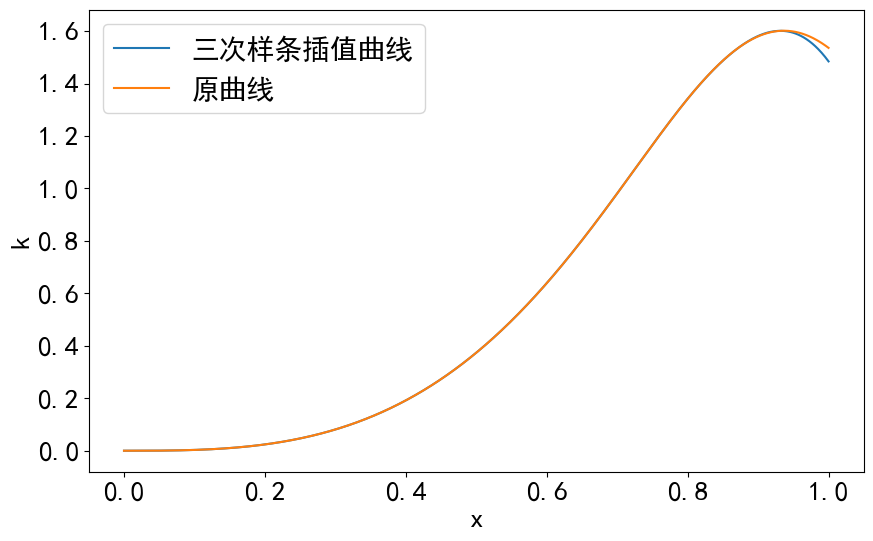

In [87]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
# 获取当前操作系统
import platform
sysstr = platform.system()
if(sysstr =="Windows"):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
elif(sysstr == "Darwin"):
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
# 定义系数a
a = float(input('请输入系数a(0.5 ~ 1): '))
def f(x):
    return a*x**3
def ds(x):
    return np.sqrt(1 + (3*a**2*x**4)**2)
def df(x):
    return 3*a**2*x**4
def d2f(x):
    return 12*a**2*x**3
s,err = scipy.integrate.quad(ds, 0, 1) # 积分计算弧长
# 等弧长采样
points = 15
# 每段弧的长度
l = s / points
x = [0]
cur_length = 0
x0 = 0
while len(x) < points:
    x0 += 0.0001
    cur_length = scipy.integrate.quad(ds, x[-1], x0)[0] # 计算当前弧长
    if abs(cur_length - l) < 1e-3:
        x.append(x0)
y = [f(i) for i in x]
# 计算各个采样点的曲率
k = []
for i in range(len(x)):
    k.append(abs(d2f(x[i]) / (1 + df(x[i])**2)**1.5))
# 三次样条插值重构每个采样点周围的曲率
cs = scipy.interpolate.CubicSpline(x, k, bc_type='clamped') # 三次样条插值
# 生成更多点用于插值
x_interp = np.linspace(0, 1, 1000)
k_interp = cs(x_interp)
# 计算原函数中各个点的曲率
k0 = []
for i in x_interp:
    k0.append(abs(d2f(i) / (1 + df(i)**2)**1.5))
# 绘图
plt.figure(figsize=(10, 6))
plt.plot(x_interp, k_interp, label='三次样条插值曲线')  
plt.plot(x_interp, k0, label='原曲线')
plt.xlabel('x', fontsize=20)
plt.ylabel('k', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [88]:
# 依据初始条件和上式计算每个点的斜率
ds = s / 1000 # 每段弧长
tan0 = df(0) # 初始斜率
tans = [tan0]
for i in range(len(x_interp)): # 递推计算每个点的斜率
    next_tan = np.tan(k_interp[i] * ds + np.arctan(tans[-1]))
    tans.append(next_tan)
# 以原点为起点，递推计算每个点的坐标
pts = [(0, 0)]
for i in range(len(x_interp)):
    nx = pts[-1][0] + (ds / np.sqrt(1 + tans[i]**2))
    ny = pts[-1][1] + (ds * tans[i] / np.sqrt(1 + tans[i]**2))
    pts.append((nx, ny))
# 修正最后一个点的坐标
pts = pts[:-1]

# 切角递推算法

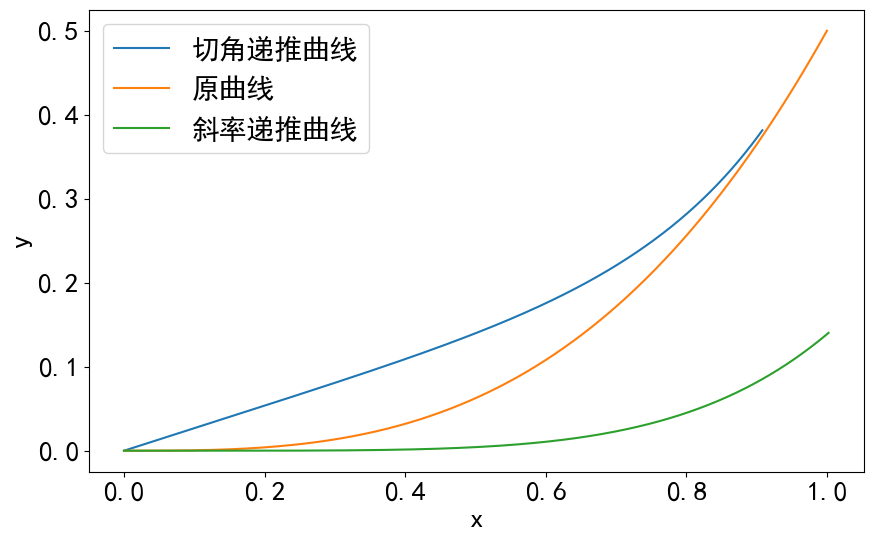

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz # 引入积分函数

# 定义弧长-曲率关系
def kappa(s):
    return cs(s)
# 定义初始条件
theta0 = np.pi / 12  # 初始角度
x0, y0 = 0, 0  # 初始点

# 定义弧长范围
s = np.linspace(0, 1, 1000)

# 计算切线角度 theta(s)
theta = cumtrapz(kappa(s), s, initial=0) + theta0

# 计算参数方程 x(s) 和 y(s)
x = x0 + cumtrapz(np.cos(theta), s, initial=0)
y = y0 + cumtrapz(np.sin(theta), s, initial=0)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='切角递推曲线')
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)), label='原曲线')
plt.plot([i[0] for i in pts], [i[1] for i in pts], label='斜率递推曲线')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()
